## Dataset

In [73]:
x = [200, 300, 400, 640, 540, 580]        # interpolasi saat x = 350
y = [2500, 2800, 3100, 3820, 3220, 3640]

In [74]:
import numpy as np

order = np.argsort(x)
x_sort = np.array(x)[order]
y_sort = np.array(y)[order]

print(order)
print(x_sort)
print(y_sort)

[0 1 2 4 5 3]
[200 300 400 540 580 640]
[2500 2800 3100 3220 3640 3820]


## Linear Interpolation

In [75]:
from scipy.interpolate import interp1d

f = interp1d(x_sort, y_sort)

# f(x) adalah interpolation untuk x
x_test = 500
y_test = f(x_test)

print(f"Interpolasi di x = {x_test} adalah {y_test}")


Interpolasi di x = 500 adalah 3185.714285714286


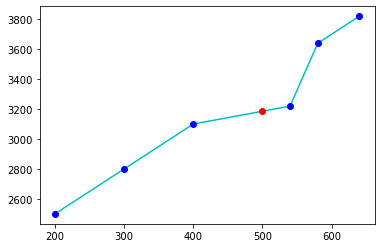

In [76]:
import matplotlib.pyplot as plt

plt.plot(x_sort, y_sort, 'c-')    # cyan, line
plt.plot(x, y, 'bo')              # blue, titik
plt.plot(x_test, y_test, 'ro')    # red, titik (dot)
plt.show()

## Quadratic Interpolation (Newton's Polynom)

In [77]:
# dari buku, ikutin aja
import numpy as np
import matplotlib.pyplot as plt


def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y
    for j in range(1, n):
        for i in range(n-j):
            coef[i][j] = \
                (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef


def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p


In [78]:
x = x_sort
y = y_sort

# cari div diff

# [COPAS]
a_s = divided_diff(x, y)[0, :]    # artinya ambil row 1

# range adalah [200, 640]
# linspace spesifikasikan banyak titik yang kita mau di argumen ke 3
# arange spesifikasikan interval titik yang kita mau di argumen ke 3
# x_new = np.linspace(200, 640, 441)
x_new = np.arange(200, 640, 1)

# argumennya : (a_s, x yang ada di data asli, x yang kita mau generate y nya)

# [COPAS]
y_new = newton_poly(a_s, x, x_new)


# cari 350 di x_new
# [200, 201, 202, ...]
for i in range(0, len(x_new)):
  if x_new[i] == 350:
    print(f"Ketemu di {i}")


x_test = x_new[150]
y_test = y_new[150]

print(f"Interpolasi di x = {x_test} adalah {y_test}")


Ketemu di 150
Interpolasi di x = 350 adalah 3114.2102153361348


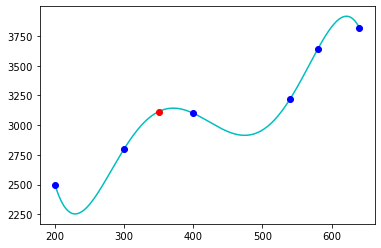

In [79]:
# Banyak titik, hasil interpolasi, (garis, f(x))
plt.plot(x_new, y_new, 'c-')  # cyan line

# Sebuah titik yang kita mau estimasi
plt.plot(x_test, y_test, 'ro')

# Beberapa titik dari data
plt.plot(x, y, 'bo')          # blue titik


plt.show()

## Cubic Interpolation (Cubic Spline)

In [80]:
from scipy.interpolate import CubicSpline

# natural, artinya di data awal dan akhir, nilainya turunan kedua 0
# [COPAS]
f = CubicSpline(x, y, bc_type='natural')

x_test = 350
y_test = f(350)

print(f"Interpolasi di x = {x_test} adalah {y_test}")



Interpolasi di x = 350 adalah 2996.307118464916


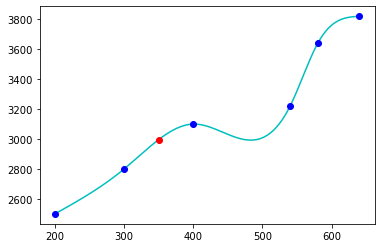

In [81]:
x_new = np.linspace(200, 640, 1000)
y_new = f(x_new)

plt.plot(x_new, y_new, 'c-')
plt.plot(x, y, 'bo')
plt.plot(x_test, y_test, 'ro')
plt.show()